In [1]:
from helpers import *

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


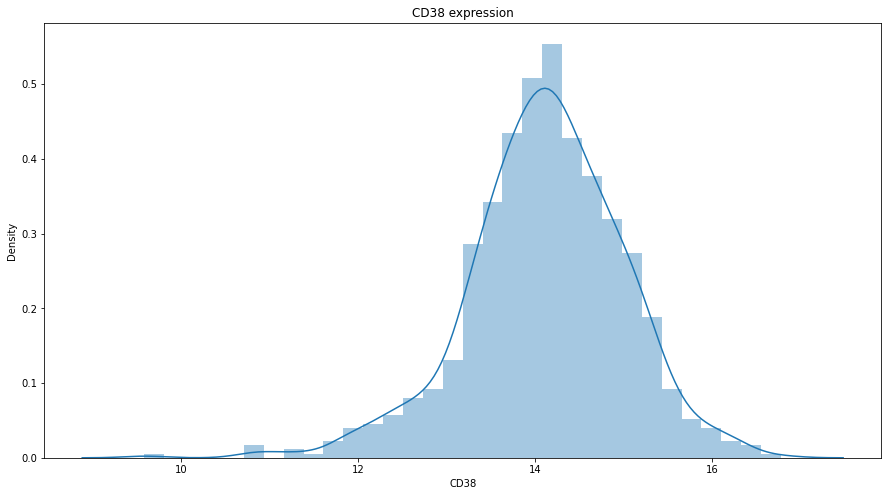

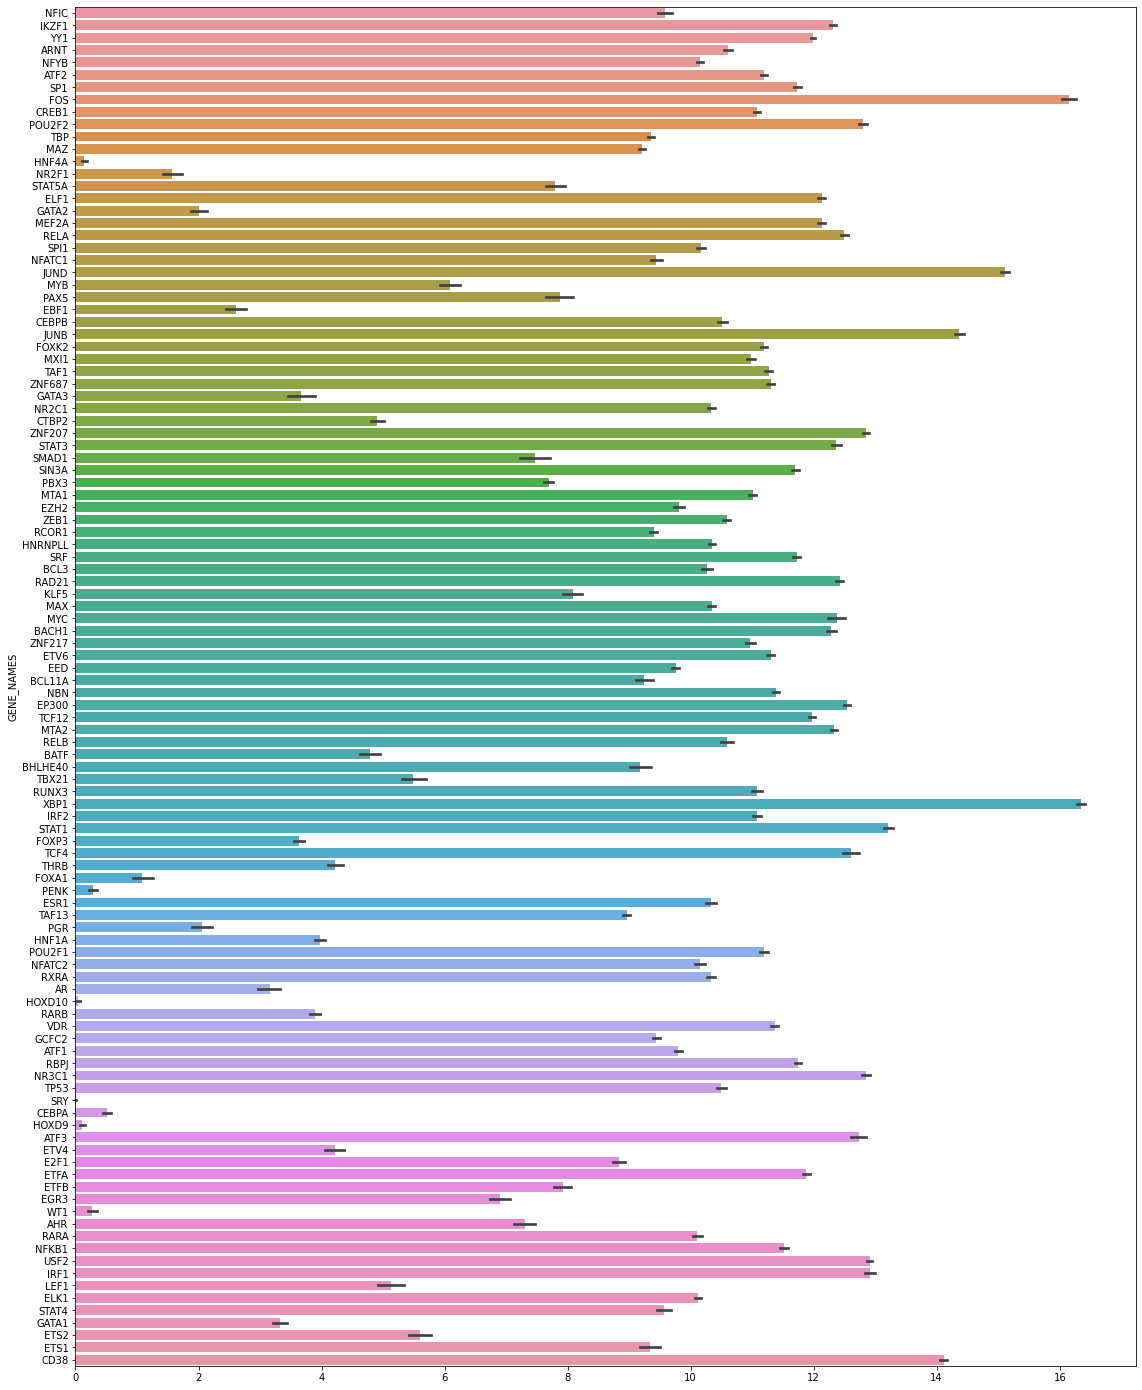

In [3]:
exploratoryPlots(y_log_train.append(y_log_test), goi_pat_log)

In [4]:
xgb, params = getModelAndBestParams(X_log_train, y_log_train, 10)

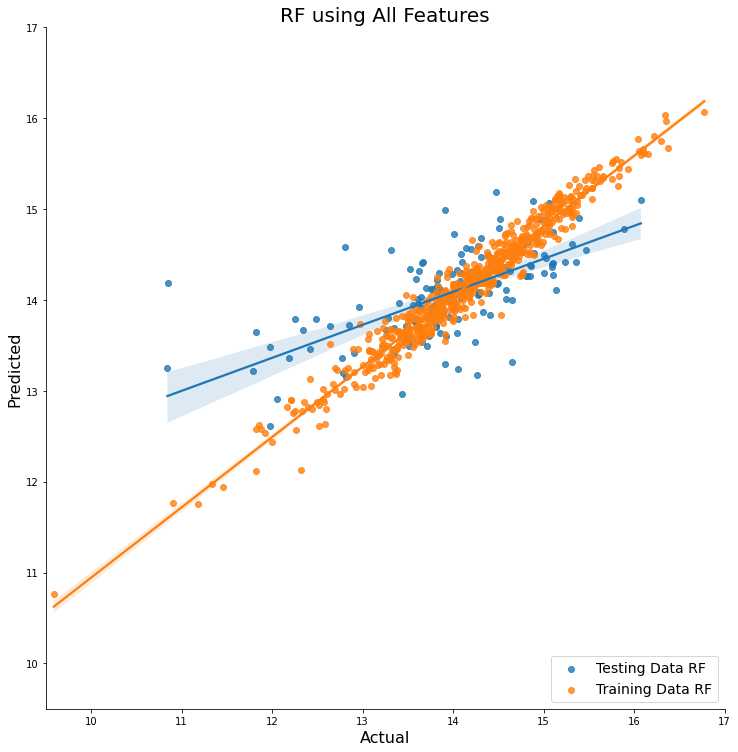

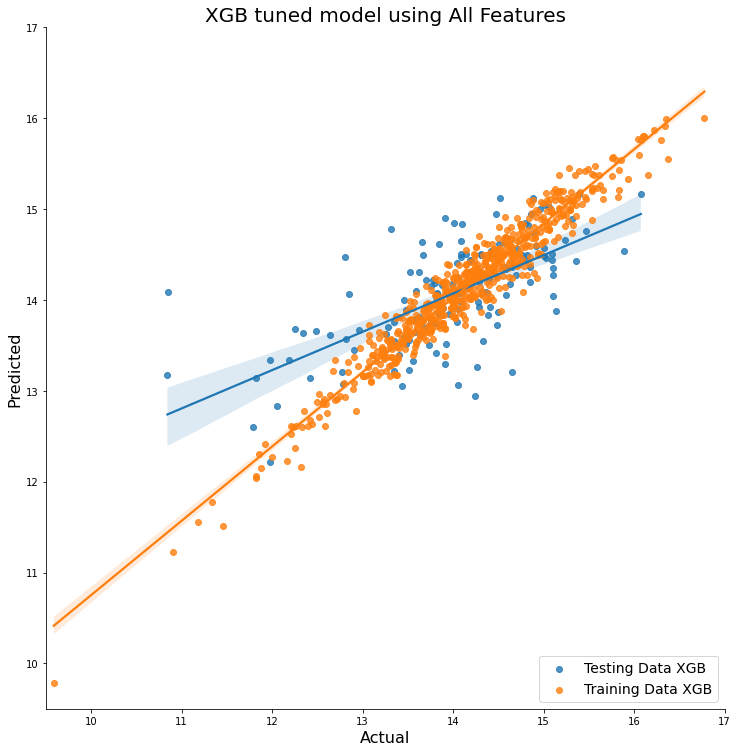

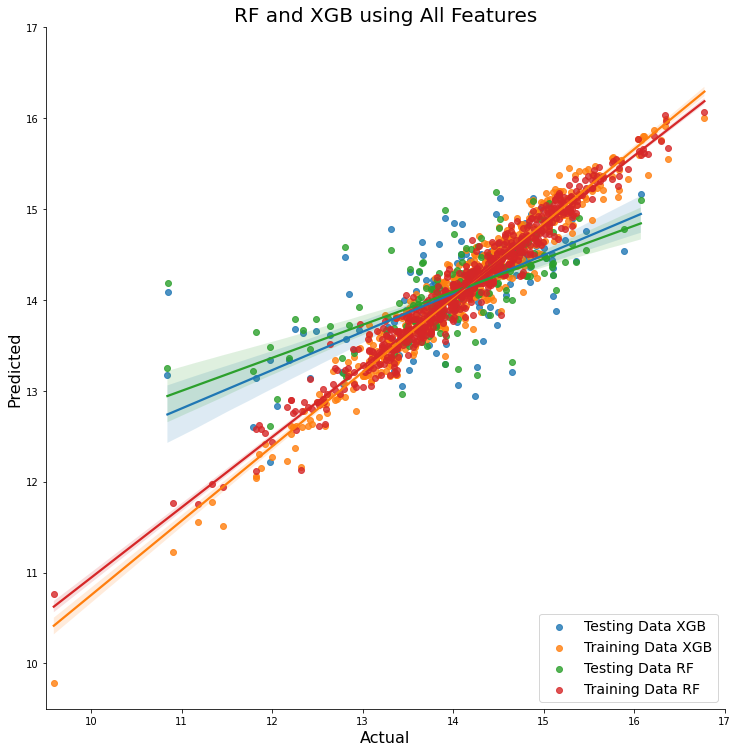

In [5]:
mae = getMAEandPlots(xgb, X_log_train, X_log_test, y_log_train, y_log_test)

In [6]:
X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [7]:
xgb_corr = buildNewModelAndFit(params, X_train_corr, y_log_train)

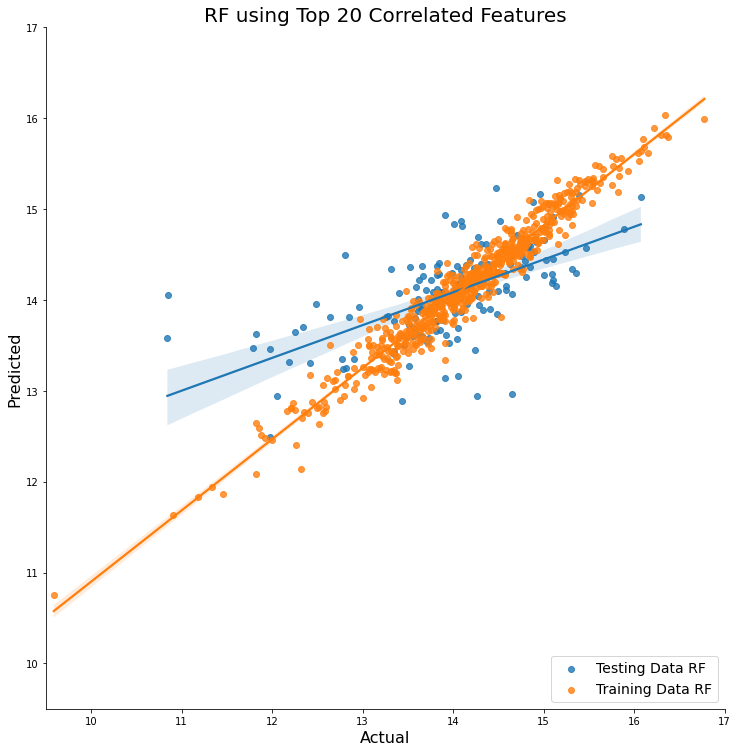

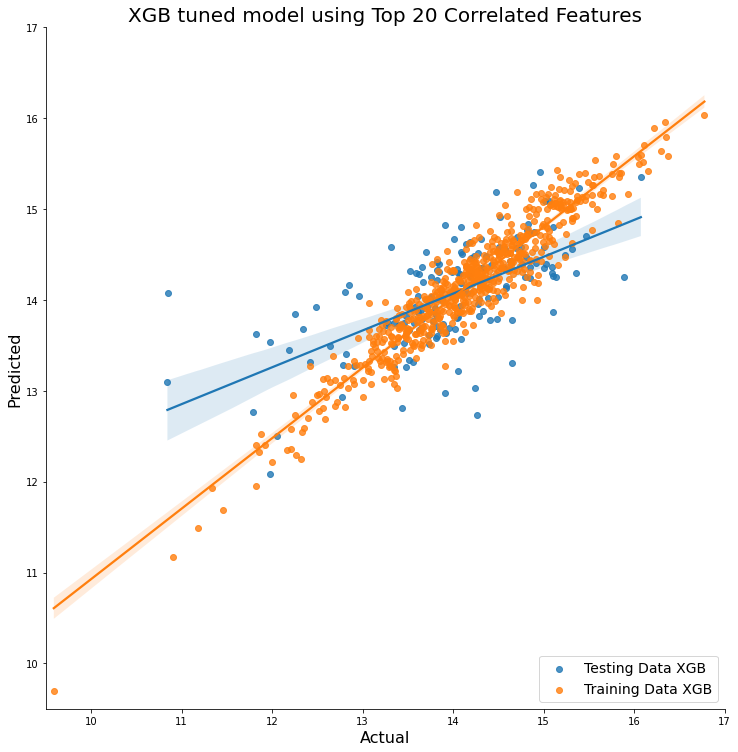

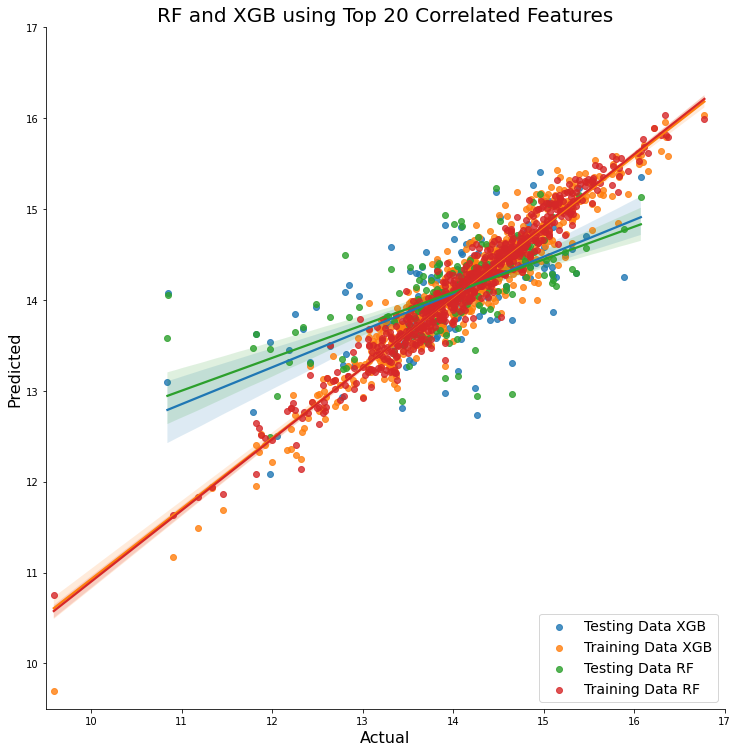

In [8]:
mae_corr = getMAEandPlots(xgb_corr, X_train_corr, X_test_corr, y_log_train, y_log_test, 'Top 20 Correlated Features')

In [9]:
perm_xgb, perm_regr, X_RF_train, X_RF_test, X_XGB_train, X_XGB_test = permImportance(params, X_log_train, X_log_test, y_log_train, y_log_test)

In [10]:
xgb_RF_perm = buildNewModelAndFit(params, X_RF_train, y_log_train)

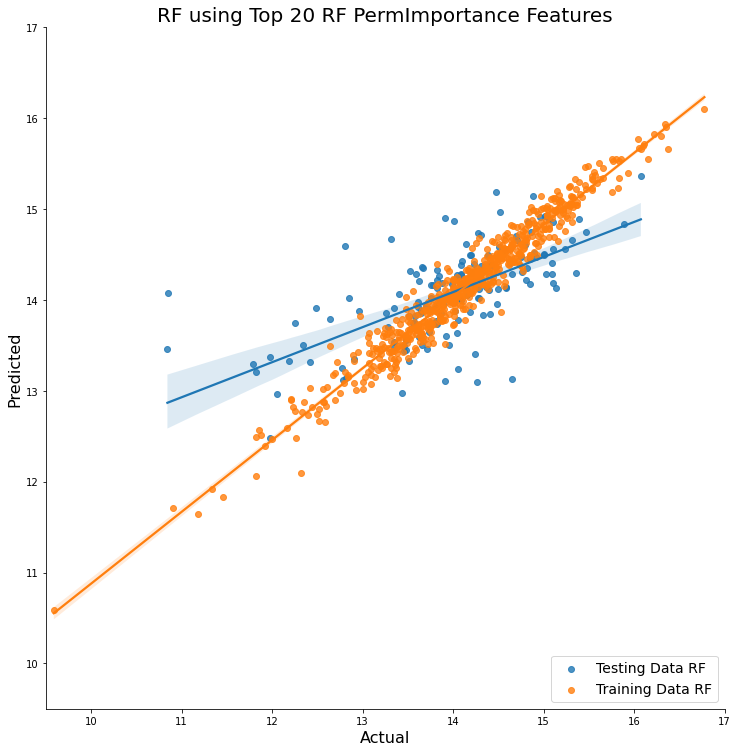

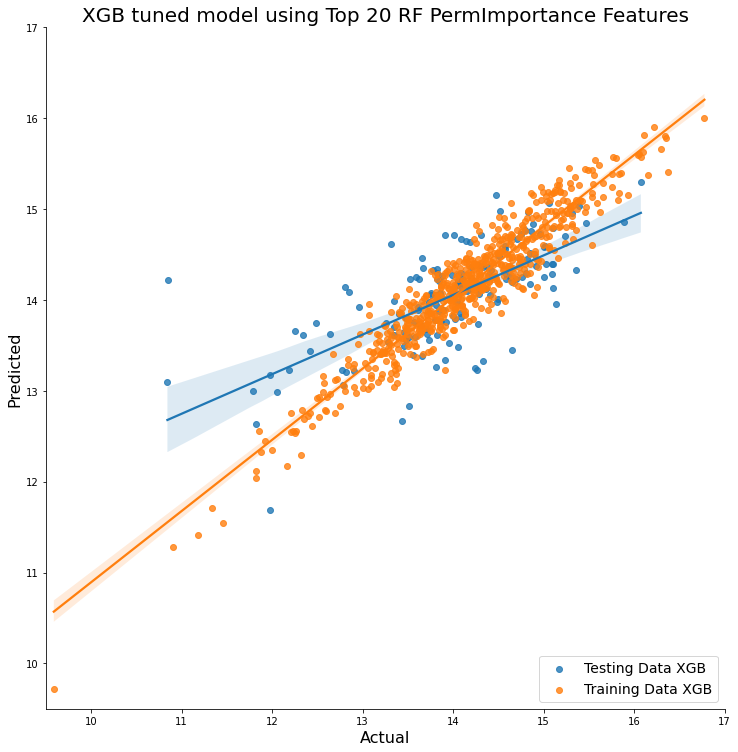

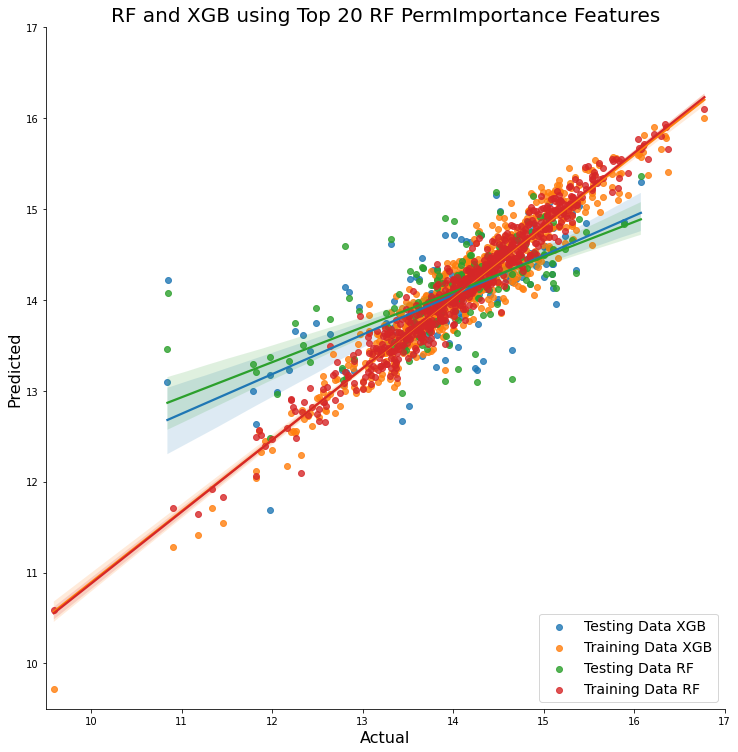

In [11]:
mae_RF_perm = getMAEandPlots(xgb_RF_perm, X_RF_train, X_RF_test, y_log_train, y_log_test, 'Top 20 RF PermImportance Features')

In [12]:
xgb_XGB_perm = buildNewModelAndFit(params, X_XGB_train, y_log_train)

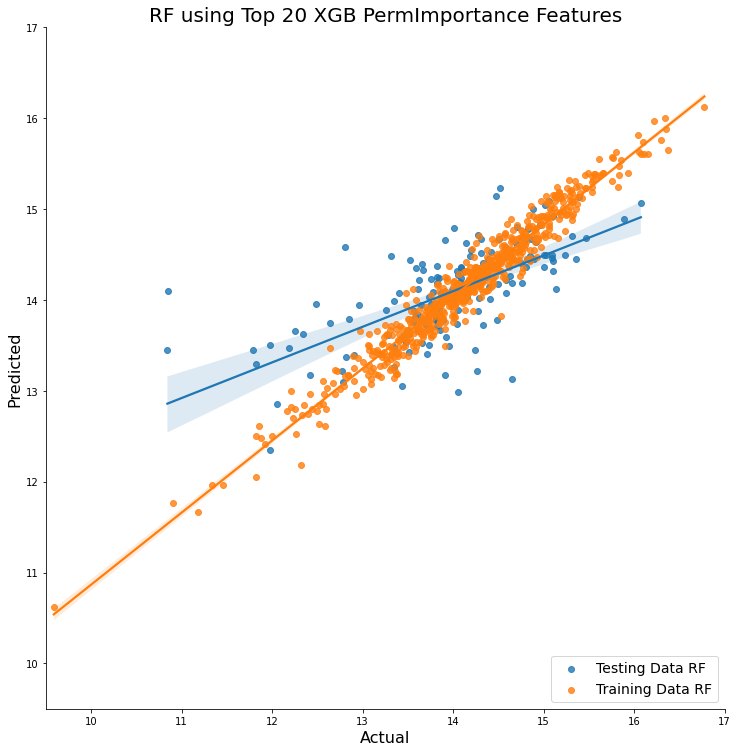

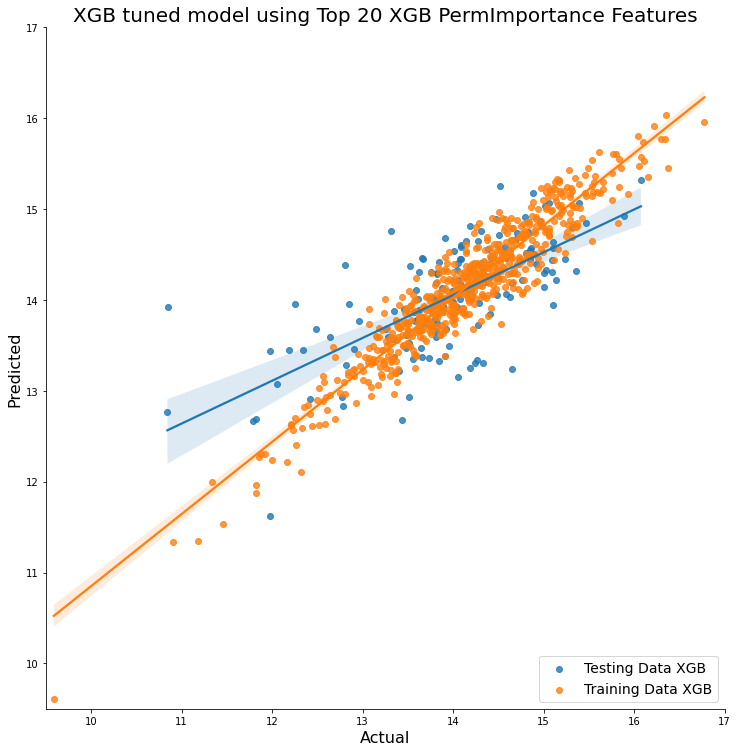

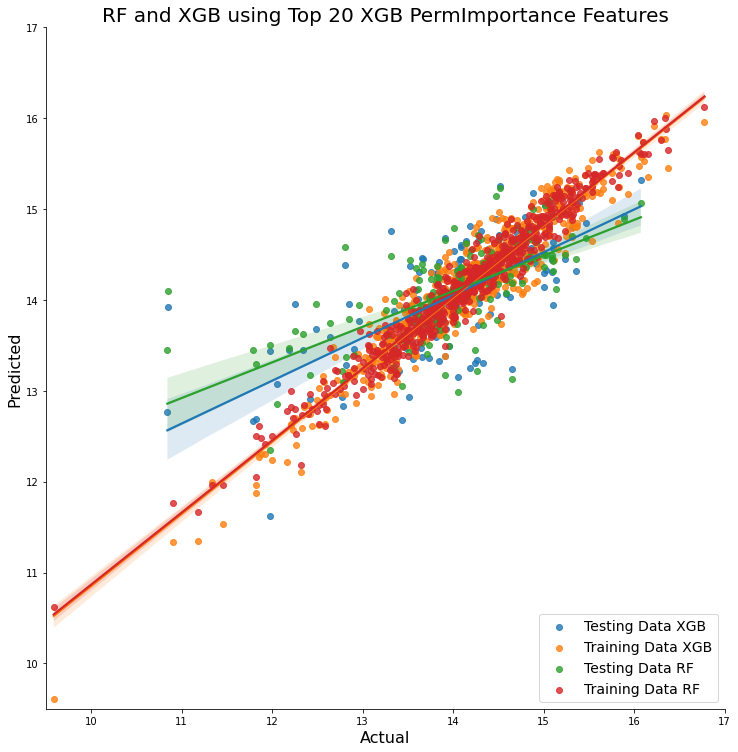

In [13]:
mae_XGB_perm = getMAEandPlots(xgb_XGB_perm, X_XGB_train, X_XGB_test, y_log_train, y_log_test, 'Top 20 XGB PermImportance Features')

In [14]:
writeToFile(mae, mae_corr, mae_RF_perm, mae_XGB_perm, X_corr, perm_regr, perm_xgb)

In [14]:
dumpModels(xgb, xgb_corr, xgb_RF_perm, xgb_XGB_perm)